# Тестовое задание на позицию Junior Data Scientist

Страница с данными
https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindices


Прямая ссылка
https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/datasets/consumerpriceindices/current/mm23.csv


Задача
Целевая переменная - “CPI INDEX 01.1.4 : MILK, CHEESE & EGGS”
1. Опишите характеристики и особенности представленных данных.
2. Проведите базовый анализ зависимости между целевой переменной и любым
другим временным рядом из данных.
3. Постройте предиктивную модель для целевой переменной с любым набором
признаков, проведите анализ результатов.
4. Сгенерируйте дополнительные признаки для предиктивной модели, оцените их
влияние на результат.
Важно показать управление данными и общие подходы к анализу.
Задание необходимо выполнить в Jupyter Notebook на Python и прислать ссылку на
открытый репозиторий.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/b93c2383b8e0cd6482231324e75ffa452e1ed106")


Где: $Q^0_i$ — выпуск i-го товара в базовом году
    $P^0_i$ — цена i-го товара в базовом году
    $P^t_i$ — цена i-го товара в текущем году

# 0. Загрузка, чистка и предобработка

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
df = pd.read_csv("C:/Users/music/Downloads/mm23.csv")

C:\Users\music\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [5]:
df.head(10)

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 RPI: Ave price - Salmon fillets, per Kg CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SER

In [6]:
df1=df.loc[:,(~df.columns.str.contains(pat = 'ANNUAL')) & (~df.columns.str.contains(pat = 'MONTHLY')) & (~df.columns.str.contains(pat = 'CPIH'))]

In [7]:
df1.shape

(1380, 1798)

In [8]:
df1=pd.concat([df1["Title"],df1.filter(regex='CPI INDEX')], axis=1)

In [9]:
df1=df1[df1.Title.str.contains('[0-9]{4} [A-Z]{3}',regex= True, na=False)]

In [10]:
df1=df1[df1['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].isna()==False]

In [11]:
df1.head()

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SERVICES 2015=100 CPI INDEX 07.2.3 : MAINTE

In [12]:
df1.dtypes

Title                                                                        object
CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                               object
CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100         object
CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100           object
CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100        object
                                                                              ...  
CPI INDEX: Excluding energy (SP) 2015=100                                    object
CPI INDEX: Excluding Energy, food, alcoholic beverages & tobacco 2015=100    object
CPI INDEX: Excluding energy & unprocessed food (SP) 2015=100                 object
CPI INDEX: Excluding seasonal food (SP) 2015=100                             object
CPI INDEX: Excluding energy & seasonal food (SP) 2015=100                    object
Length: 368, dtype: object

In [13]:
#Изменим тип данных и преобразуем Дату в формат даты
df2=pd.concat([pd.to_datetime(df1.Title).rename('Date'), df1.iloc[:,1:].astype('float')], axis=1)


## 1. Описание данных и целевой переменной

In [14]:
df2.head()

Date  CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100  CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100  CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100  CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100  CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100  CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100  CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100  CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100  CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100  CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100  CPI INDEX 03.1 : CLOTHING 2015=100  CPI INDEX 02.2 : TOBACCO 2015=100  CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 06 : HEALTH 2015=100  CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100  CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100  CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100  CPI INDEX 01.1 : FOOD 2015=100  CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100  CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100  CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100  CPI INDEX 00: ALL ITEMS 2015=100  CPI INDEX 10 : EDUCATION 2015=100  CPI INDEX 09 : RECREATION & CULTURE 2015=100  CPI INDEX 08 : COMMUNICATION 2015=100  CPI INDEX 07 : TRANSPORT 2015=100  CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100  CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100  CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100  CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100  CPI INDEX 03.1.2 : GARMENTS 2015=100  CPI INDEX 02.1.3 : BEER 2015=100  CPI INDEX 02.1.2 : WINE 2015=100  CPI INDEX 02.1.1 : SPIRITS 2015=100  CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100  CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100  CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100  CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100  CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100  CPI INDEX 01.1.6 : FRUIT 2015=100  CPI INDEX 12.6.2 : Other financial services (nec) 2015=100  CPI INDEX 12.1 : PERSONAL CARE 2015=100  CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100  CPI INDEX 01.1.5 : OILS & FATS 2015=100  CPI INDEX 11.1 : Catering services 2015=100  CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100  CPI INDEX 01.1.3 : FISH 2015=100  CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100  CPI INDEX 01.1.2 : MEAT 2015=100  CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100  CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100  CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100  CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100  CPI INDEX 08.1 : POSTAL SERVICES 2015=100  CPI INDEX 12.5 : INSURANCE 2015=100  CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100  CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100  CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100  CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100  CPI INDEX 12.5.2 : House contents insurance 2015=100  CPI INDEX 09.1.3 : Data processing equipment 2015=100  CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100  CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100  CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100  CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100  CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100  CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100  CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=

In [15]:
df2['Year']=df2.Date.dt.year
df2['Month']=df2.Date.dt.month

In [16]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing_values_table(df2)

Your selected dataframe has 370 columns.
There are 214 columns that have missing values.


Missing Values  % of Total Values
CPI INDEX 07.2.4.1 Hire of garages, parking spaces and personal transport equipment 2015=100  324             84.8             
CPI INDEX 09.4.2.1 Cinemas, theatres, concerts 2015=100                                       324             84.8             
CPI INDEX 05.2.0.3 Table linen and bathroom linen 2015=100                                    324             84.8             
CPI INDEX 05.5.2.1 Non-motorized small tools 2015=100                                         324             84.8             
CPI INDEX 05.5.1.2 Repair, leasing and rental of major tools and equipment 2015=100           324             84.8             
...                                                                                           ...              ...             
CPI INDEX 06.1.2/3 : OTHER MEDICAL AND THERAPEUTIC EQUIPMENT 2015=100                         83              21.7             
CPI INDEX 09.6 : PACKAGE HOLIDAY 2015=100                                                     60              15.7             
CPI INDEX: Package holidays & accommodation (S) 2015=100                                      60              15.7             
CPI INDEX 05.3.3 : REPAIR OF HOUSEHOLD APPLIANCES 2015=100                                    60              15.7             
CPI INDEX 09.1.3 : Data processing equipment 2015=100                                         35              9.2              

[214 rows x 2 columns]

C:\Users\music\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


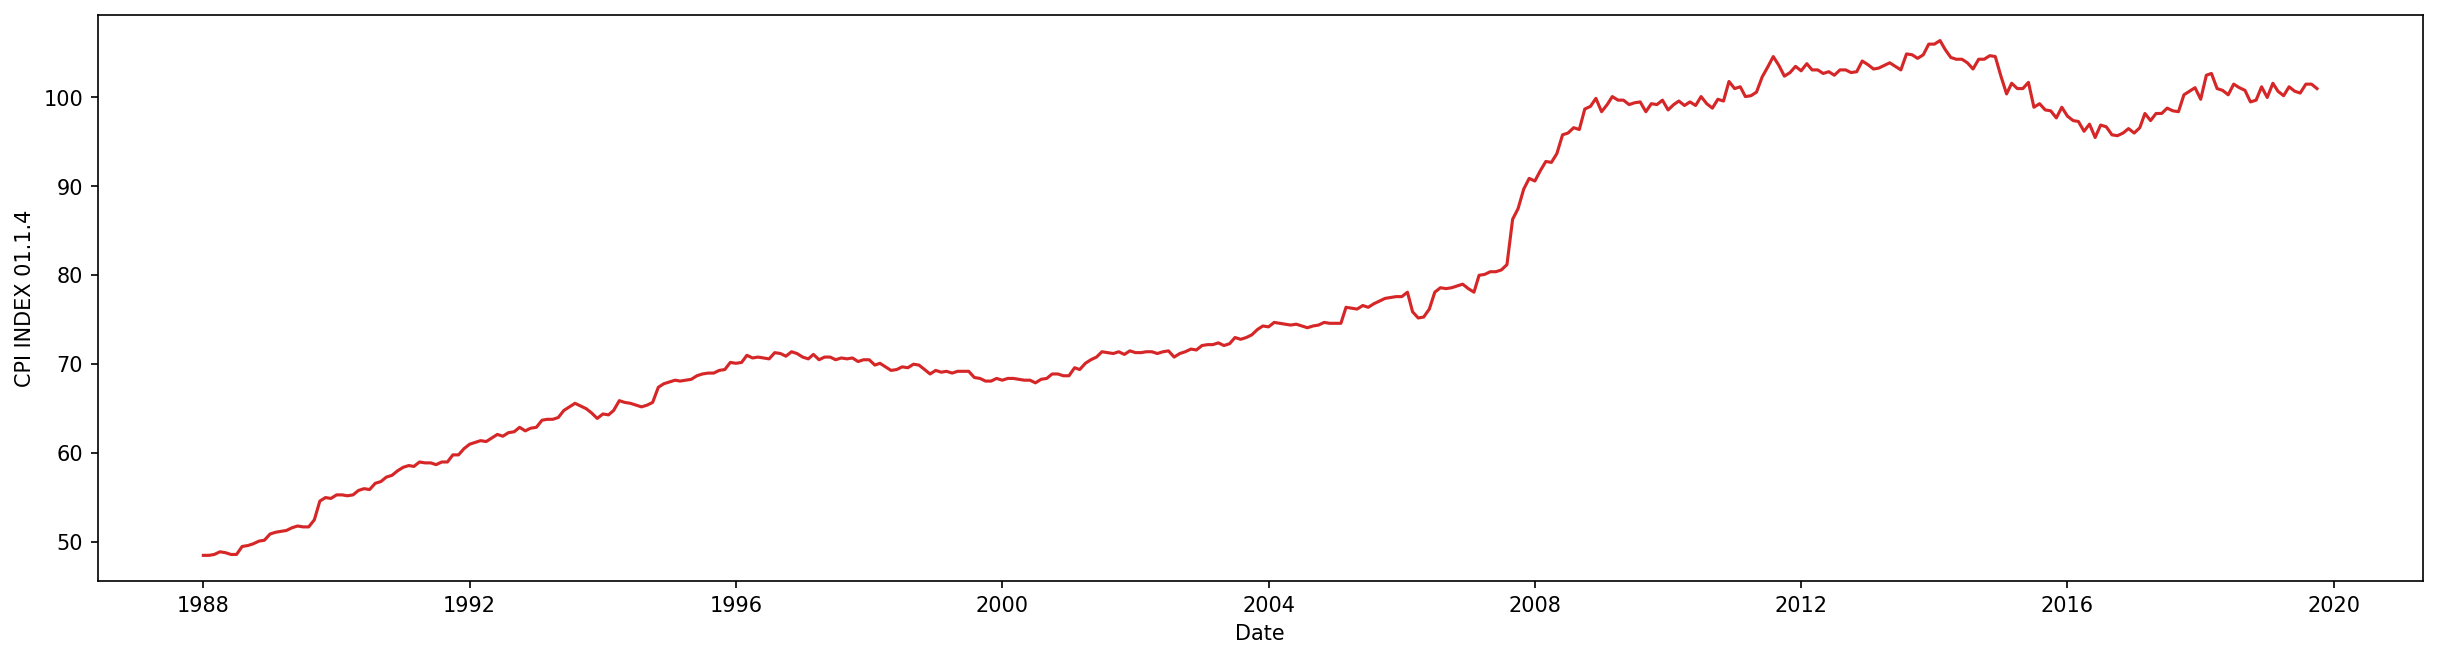

In [18]:
def plot_df(x, y, title="", xlabel='Date', ylabel='CPI INDEX 01.1.4', dpi=150):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=df2.Date, y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], title='')

### Рассмотрим данные в разрезе последних 3 лет

Индекс потребительских цен для молочки медленно рос до 2008(начало мирового кризиса), а после этого совершил скачок на 20 пунктов и после этого наблюдаются флуктуации.

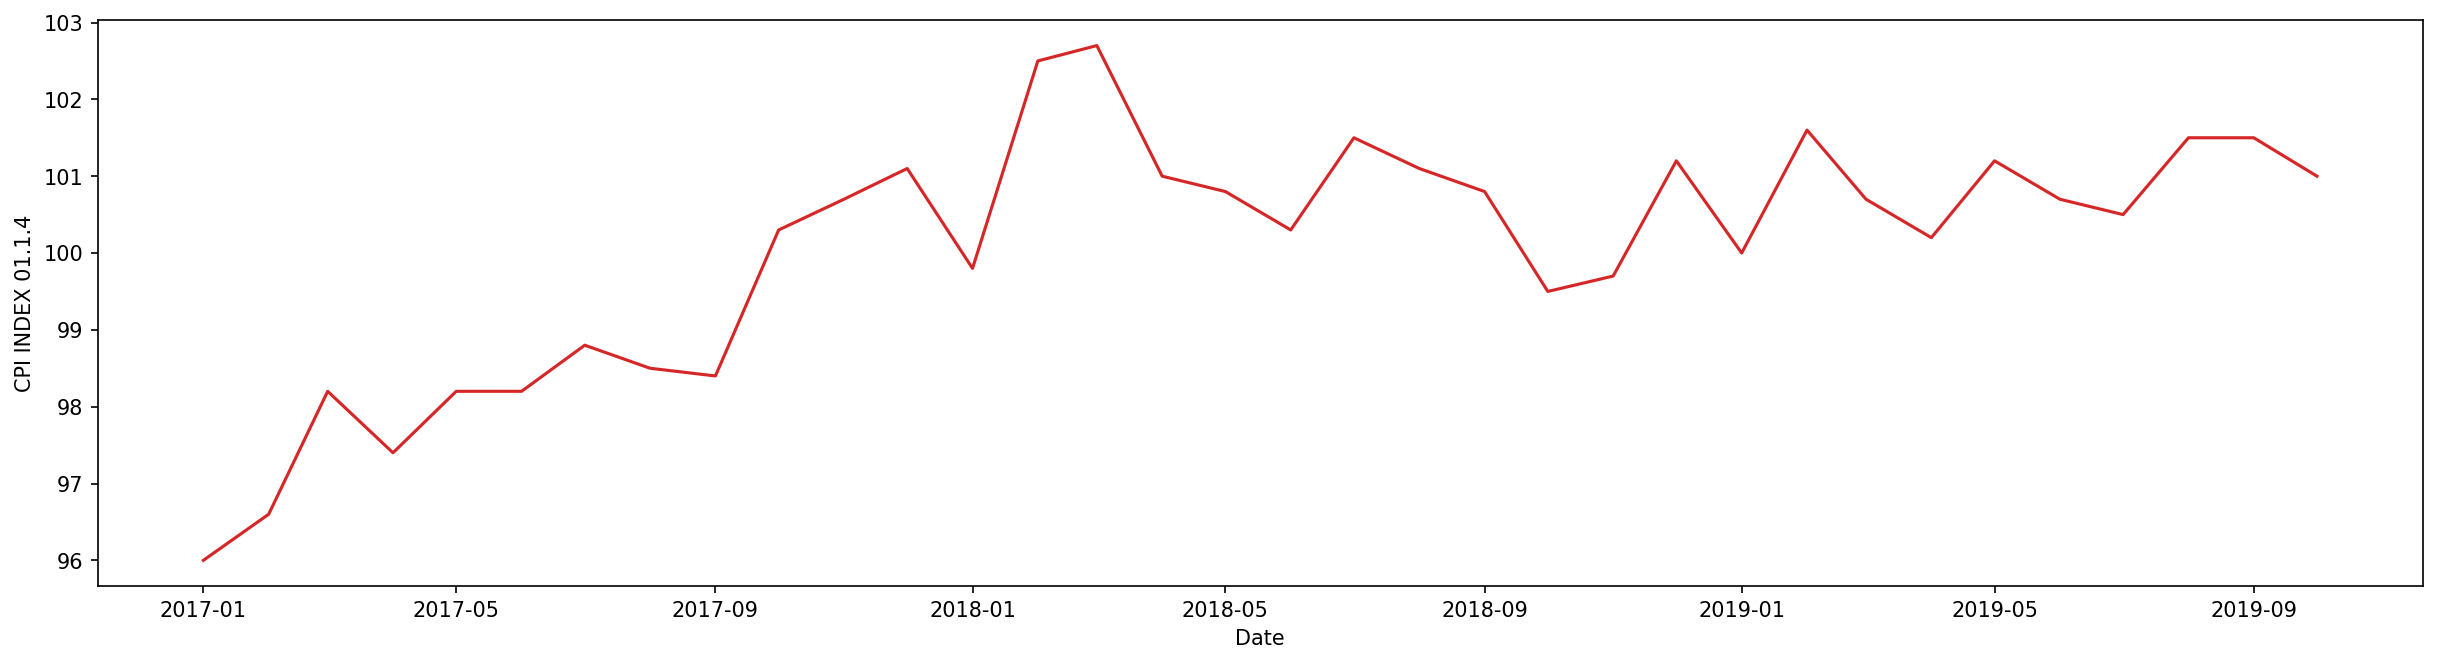

In [19]:
plot_df(x=df2.Date[df2.Year>=2017], y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][df2.Year>=2017], title='')

Сезонность не видна в данных

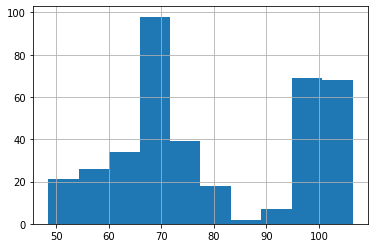

In [20]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].hist()

Гистограмма также демонстрирует бимодальность, которая разделяет моды до 2008г и после.

In [21]:
#Базовые статистики
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].describe()

count    382.000000
mean     79.796859 
std      17.296058 
min      48.500000 
25%      68.300000 
50%      74.000000 
75%      99.200000 
max      106.400000
Name: CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100, dtype: float64

In [22]:
#Базовые статистики по группе молочки, яйца и молочные субпродукты
df2.filter(regex='01.1.4').describe()

CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 01.1.4.2 Low fat milk 2015=100  CPI INDEX 01.1.4.1 Whole milk 2015=100  CPI INDEX 01.1.4.6 Other milk products 2015=100  CPI INDEX 01.1.4.5 Cheese and curd 2015=100  CPI INDEX 01.1.4.4 Yoghurt 2015=100  CPI INDEX 01.1.4.7 Eggs 2015=100
count  382.000000                                       58.000000                                 58.00000                                58.000000                                        58.000000                                    58.000000                            58.000000                       
mean   79.796859                                        99.870690                                 104.85000                               101.434483                                       98.524138                                    99.068966                            92.113793                       
std    17.296058                                        2.348423                                  4.82887                                 3.402092                                         1.960783                                     4.387031                             4.708985                        
min    48.500000                                        96.300000                                 99.30000                                93.500000                                        94.500000                                    90.200000                            85.200000                       
25%    68.300000                                        97.600000                                 100.40000                               99.250000                                        97.325000                                    95.925000                            89.675000                       
50%    74.000000                                        100.300000                                102.40000                               102.250000                                       98.500000                                    99.150000                            90.800000                       
75%    99.200000                                        102.000000                                110.37500                               104.400000                                       99.575000                                    101.775000                           91.800000                       
max    106.400000                                       102.900000                                112.20000                               107.100000                                       103.300000                                   108.200000                           104.500000

# 2. Анализ зависимости между целевой переменной и любым другим временным рядом из данных
Базовая зависимость между переменными легче всего определить через линейную взаимосвязь,что выражается коэф.корреляции.
Найдем переменные, которые высоко коррелируют с целевой.

In [23]:
df2=df2.set_index('Date')

In [24]:
correlations=df2.corr()['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [25]:
correlations.abs().sort_values(ascending=False)[1:50]

CPI INDEX: Non-seasonal food (G) 2015=100                                           0.985765
CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100                    0.983588
CPI INDEX 01.1 : FOOD 2015=100                                                      0.982421
CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100                            0.981336
CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100                                         0.979511
CPI INDEX 04.4.1 : WATER SUPPLY 2015=100                                            0.976525
CPI INDEX 01.1.2 : MEAT 2015=100                                                    0.976214
CPI INDEX: Energy and unprocessed food (SP) 2015=100                                0.975172
CPI INDEX: Unprocessed food (G) 2015=100                                            0.973907
CPI INDEX: Energy, food, alcohol and tobacco (SP) 2015=100                          0.973246
CPI INDEX: Energy and seasonal food (SP) 2015=100                     

Проверим выборочно полученные результаты и построим графики(если точки лежат на одной прямой, то это будет означать, что связь между переменными действительно линейная)

Text(0.5, 1.0, 'Correlation')

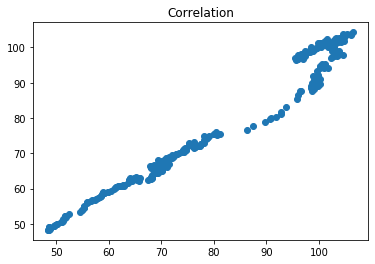

In [26]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Non-seasonal food (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

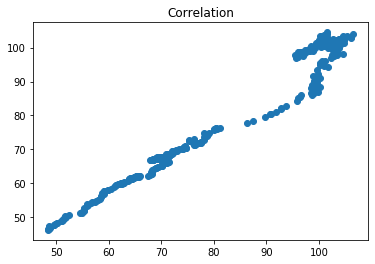

In [27]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

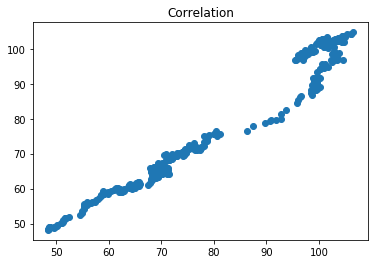

In [28]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX 01.1 : FOOD 2015=100']);
plt.title('Correlation')

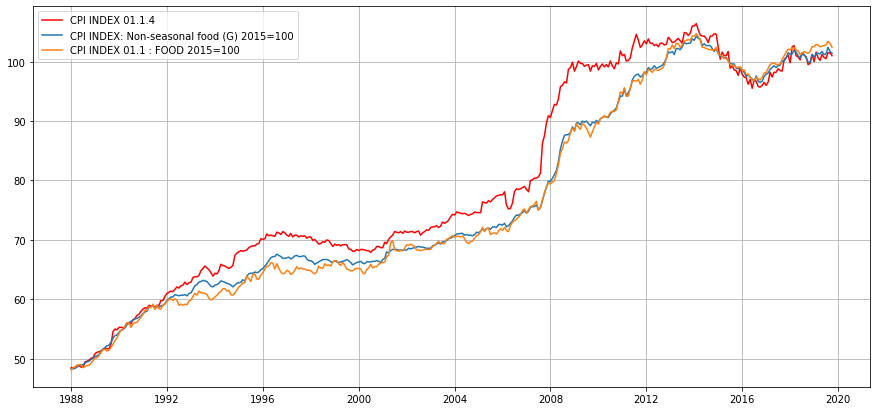

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], "r", label="CPI INDEX 01.1.4")
plt.plot(df2['CPI INDEX: Non-seasonal food (G) 2015=100'], label="CPI INDEX: Non-seasonal food (G) 2015=100")
plt.plot(df2['CPI INDEX 01.1 : FOOD 2015=100'], label="CPI INDEX 01.1 : FOOD 2015=100")
plt.legend(loc="best")
plt.grid(True);

In [30]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].autocorr()

0.9991344197599843

Автокорреляция очень сильная, попробуем провести декомпозицию и построим АФКФ и ЧАКФ.

Критерий Дики-Фуллера: p=0.587382


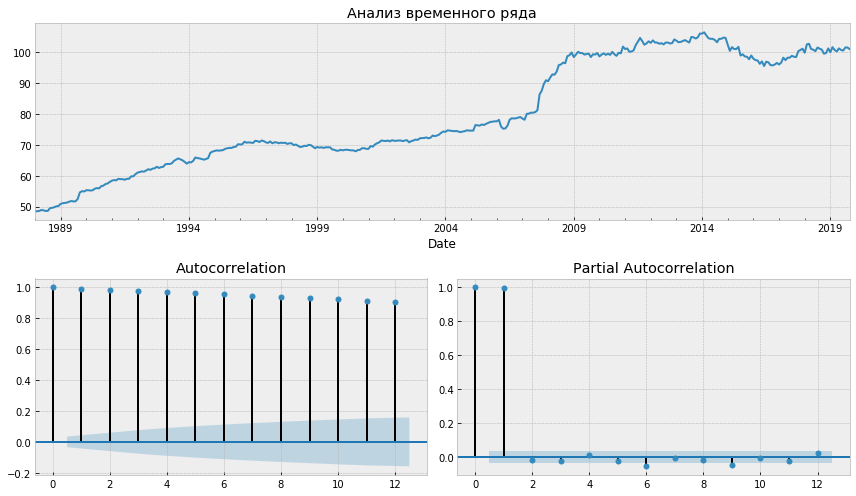

In [31]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Анализ временного ряда')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], lags=12)

Критерий Дики-Фуллера:
H0: Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.
H1: Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры.
Т.к. p=0.587382>0.05 т.о. мы не можем отклонить нулевую гипотезу, следовательно ряд является нестационарным.

Проведем декомпозицию по аддидивной модели выделяя тренд, сезонность и остатки

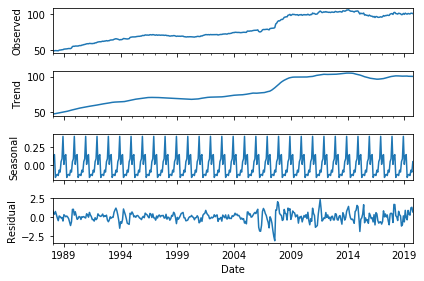

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], model='additive', 
                            #freq=12
                            extrapolate_trend='freq'
                           )
result.plot()
plt.rcParams["figure.figsize"] = [16,19]
plt.show()

Хотя декомпозиция ряда и выловила сезонную составляющую, но она похожа скорее на шум.

# 3. Построим предиктивную модель как временного ряда(без предикторов)

In [33]:
df3=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][df2['Year']>2008]

In [34]:
df3.head()

Date
2009-01-01    98.4 
2009-02-01    99.2 
2009-03-01    100.1
2009-04-01    99.7 
2009-05-01    99.7 
Name: CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100, dtype: float64

# 3.1 Проведем классический анализ временного ряда и построим модель SARIMA

In [35]:
#Разделим данные на обучающее и тестовое множество-10%
train = df3[:int(0.9*(len(df3)))]
test = df3[int(0.9*(len(df3))):]
print(train.shape)
print(test.shape)

(117,)
(13,)


In [36]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\music\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\music\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=304.684, BIC=318.452, Fit time=0.240 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=305.635, BIC=311.142, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=302.787, BIC=313.801, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=302.919, BIC=313.934, Fit time=0.128 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=303.186, BIC=311.446, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=303.212, BIC=316.980, Fit time=0.337 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=304.118, BIC=317.885, Fit time=0.298 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=304.643, BIC=321.165, Fit time=0.590 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=304.566, BIC=312.827, Fit time=0.037 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

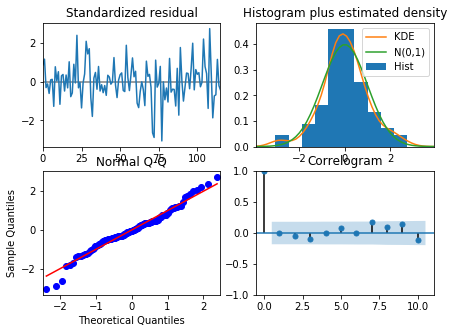

In [37]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

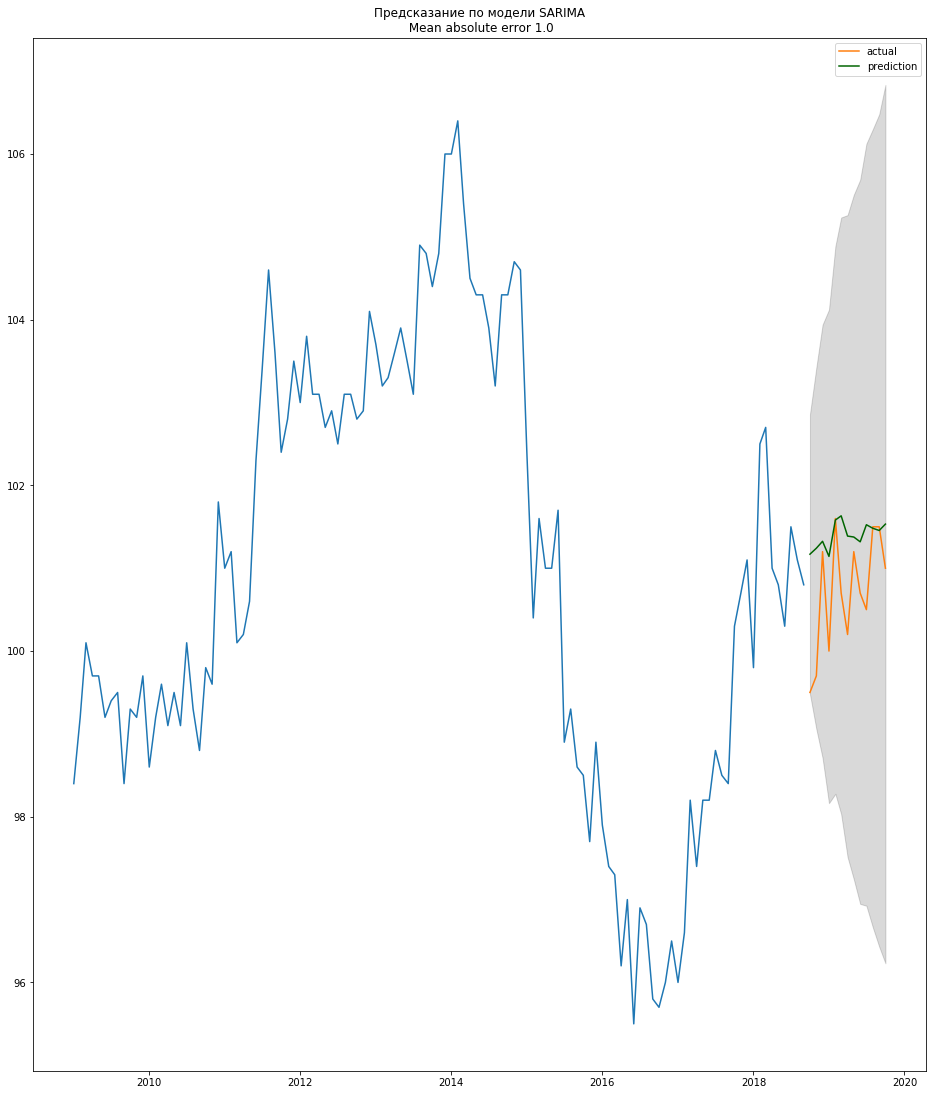

In [38]:
# Предсказание
from sklearn.metrics import mean_absolute_error, mean_squared_error
n_periods = test.shape[0]
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(test.index[0], periods = n_periods, freq='MS')

# создадим серию предсказаний для построения графика
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(test,label="actual")

plt.plot(fc_series, color='darkgreen',label="prediction")
plt.legend(loc="best")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Предсказание по модели SARIMA\n Mean absolute error {}".format(round(mean_absolute_error(fc_series, test))))
plt.show()

In [39]:
error=pd.DataFrame(data=dict(test=test, predict=fc_series,abs_error=abs(test-fc_series)))
print(error)

             test     predict  abs_error
2018-10-01  99.5   101.169462  1.669462 
2018-11-01  99.7   101.241462  1.541462 
2018-12-01  101.2  101.325055  0.125055 
2019-01-01  100.0  101.142539  1.142539 
2019-02-01  101.6  101.581634  0.018366 
2019-03-01  100.7  101.632388  0.932388 
2019-04-01  100.2  101.388068  1.188068 
2019-05-01  101.2  101.376709  0.176709 
2019-06-01  100.7  101.318757  0.618757 
2019-07-01  100.5  101.524831  1.024831 
2019-08-01  101.5  101.482411  0.017589 
2019-09-01  101.5  101.455521  0.044479 
2019-10-01  101.0  101.532605  0.532605 


In [40]:
from sklearn.metrics import *
print(mean_squared_error(test,fc_series))
print(mean_absolute_error(test,fc_series))
error.abs_error.mean()

0.8089044389218186
0.6947932548655914


0.6947932548655914

# 3.2 Построим линейную регрессию используя лаги

In [41]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)


    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [42]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = prepareData(df3, test_size=0.15, lag_start=3, lag_end=10)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

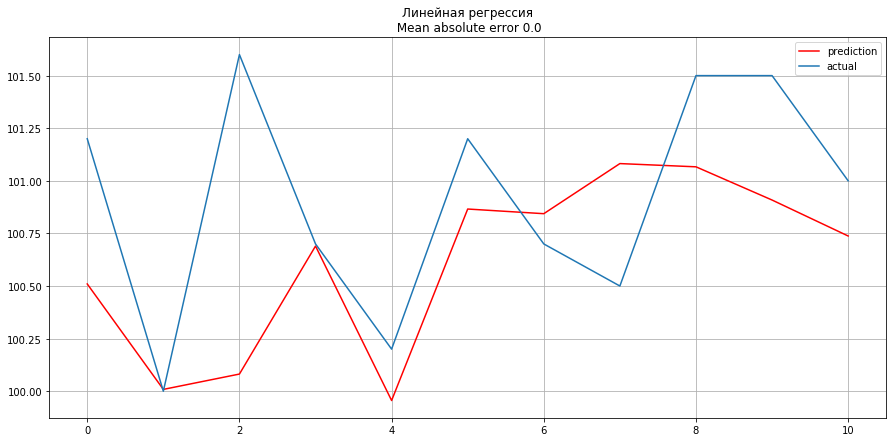

In [43]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_test,prediction))))
plt.grid(True);

Линейная регрессионная модель с лагами показала отличный результат с абсолютной ошибкой около 0.

In [44]:
error1=pd.DataFrame(data=dict(test=y_test, predict=prediction,abs_error=abs(y_test-prediction)))
error1.head(11)

test     predict  abs_error
110  101.2  100.509817  0.690183 
111  100.0  100.008653  0.008653 
112  101.6  100.081543  1.518457 
113  100.7  100.689887  0.010113 
114  100.2  99.955849   0.244151 
115  101.2  100.865904  0.334096 
116  100.7  100.843779  0.143779 
117  100.5  101.081909  0.581909 
118  101.5  101.066543  0.433457 
119  101.5  100.908668  0.591332 
120  101.0  100.737739  0.262261

In [45]:
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
error1.abs_error.mean()

0.35628196842095183
0.4380356701129903


0.4380356701129903

# 3.3 Предиктивная модель для целевой переменной с любым набором признаков

## 3.3.1 Линейная регрессия с 1-ой переменной

In [46]:
#df4=df2[df2['Year']>2008].reset_index(drop=True)
df4=df2[df2['Year']>2008].reset_index()
X_train=df4[['CPI INDEX: Non-seasonal food (G) 2015=100']][:len(df4)-13]
y_train=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][:len(df4)-13]
X_test=df4[['CPI INDEX: Non-seasonal food (G) 2015=100']][len(df4)-12:]
y_test=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][len(df4)-12:]
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

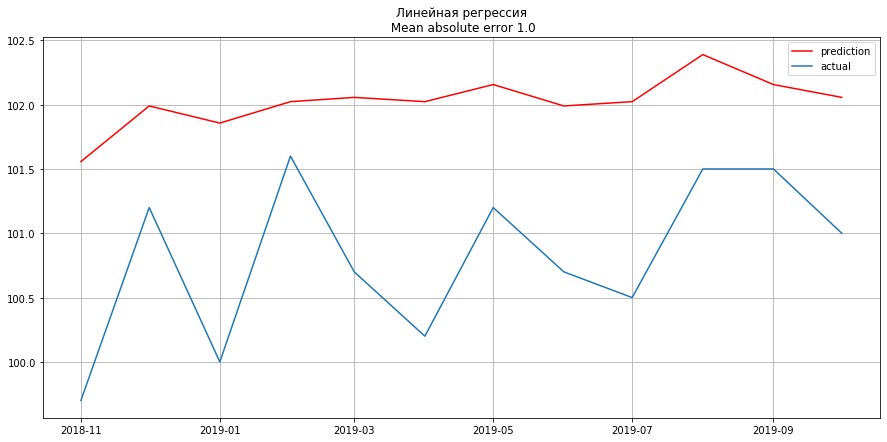

In [47]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],prediction, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_test,prediction))))
plt.grid(True);

In [48]:
pd.DataFrame(data=dict(test=y_test, predict=prediction,abs_error=abs(y_test-prediction)))

test     predict  abs_error
118  99.7   101.557093  1.857093 
119  101.2  101.989744  0.789744 
120  100.0  101.856621  1.856621 
121  101.6  102.023025  0.423025 
122  100.7  102.056306  1.356306 
123  100.2  102.023025  1.823025 
124  101.2  102.156149  0.956149 
125  100.7  101.989744  1.289744 
126  100.5  102.023025  1.523025 
127  101.5  102.389115  0.889115 
128  101.5  102.156149  0.656149 
129  101.0  102.056306  1.056306

# 3.3.2 Catboost регрессия сo всеми переменными

In [49]:
X = df4.drop(['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100','Date'], axis=1)
y = df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [50]:
categorical_features_indices = np.where((X.columns == 'Month')| (X.columns == 'Year'))[0]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=True)

In [88]:
from catboost import CatBoostRegressor,Pool
model=CatBoostRegressor(#iterations=50, 
                        depth=4, 
                        learning_rate=0.01, 
                        loss_function='MAE',
                        l2_leaf_reg = 5,
                        task_type = "GPU",
                        early_stopping_rounds=100)
model.fit(X_train, y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          use_best_model=True,
          verbose=200,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.8923229	test: 2.6715921	best: 2.6715921 (0)	total: 36.4ms	remaining: 36.4s
200:	learn: 1.3699304	test: 2.1550631	best: 2.1550631 (200)	total: 5.16s	remaining: 20.5s
400:	learn: 1.0298350	test: 1.7497832	best: 1.7497832 (400)	total: 10.2s	remaining: 15.2s
600:	learn: 0.7714436	test: 1.4297918	best: 1.4297918 (600)	total: 15.3s	remaining: 10.2s
800:	learn: 0.6047644	test: 1.2119008	best: 1.2119008 (800)	total: 20.4s	remaining: 5.06s
999:	learn: 0.5034293	test: 1.1057708	best: 1.1057708 (999)	total: 25.4s	remaining: 0us
bestTest = 1.105770796
bestIteration = 999


In [89]:
pred=model.predict(X_validation)

In [90]:
pd.DataFrame(data=dict(test=y_validation, predict=pred,abs_error=abs(y_validation-pred)))

test     predict  abs_error
79   99.3   100.179961  0.879961 
29   102.3  101.450666  0.849334 
58   104.8  103.572159  1.227841 
50   103.3  103.418546  0.118546 
56   104.8  103.345726  1.454274 
96   96.0   98.747332   2.747332 
45   102.8  103.146857  0.346857 
23   101.8  100.483398  1.316602 
99   97.4   98.603974   1.203974 
13   99.2   99.224453   0.024453 
67   103.2  103.530191  0.330191 
31   104.6  102.166407  2.433593 
87   96.2   98.362499   2.162499 
80   98.6   99.955113   1.355113 
55   104.9  103.216006  1.683994 
32   103.6  102.486957  1.113043 
65   104.3  103.181158  1.118842 
78   98.9   100.095901  1.195901 
6    99.4   99.274687   0.125313 
39   103.1  103.016414  0.083586 
47   104.1  103.467524  0.632476 
103  98.5   98.805104   0.305104 
101  98.2   98.956628   0.756628 
20   98.8   99.370855   0.570855 
105  100.3  100.280078  0.019922 
94   96.0   98.501482   2.501482 
38   103.1  103.184768  0.084768 
93   95.7   98.505227   2.805227 
115  101.1  100.868904  0.231096 
26   100.1  101.202412  1.102412 
71   104.6  101.220162  3.379838 
61   106.4  103.566745  2.833255 
98   98.2   98.725819   0.525819 
54   103.1  103.553610  0.453610 
60   106.0  103.363449  2.636551 
72   102.4  101.310183  1.089817 
17   99.1   99.350519   0.250519 
14   99.6   99.265840   0.334160 
121  101.6  100.760551  0.839449

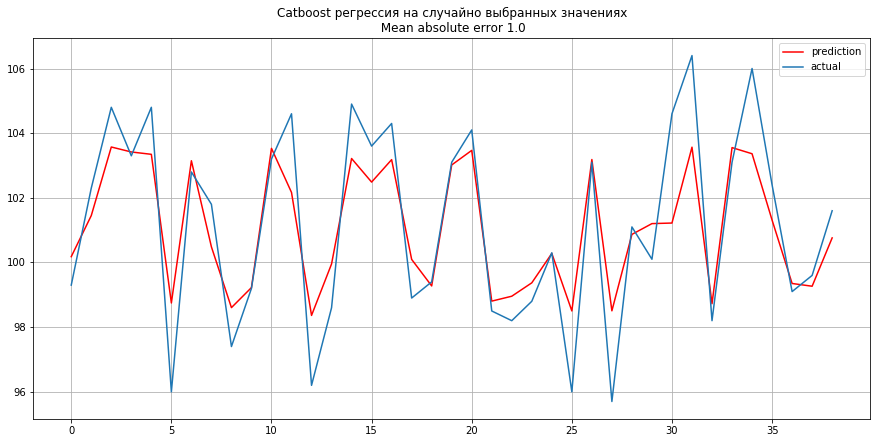

In [91]:
plt.figure(figsize=(15, 7))
plt.plot(pred, "r", label="prediction")
plt.plot(y_validation.values, label="actual")
plt.legend(loc="best")
plt.title("Catboost регрессия на случайно выбранных значениях\n Mean absolute error {}".format(round(mean_absolute_error(y_validation,pred))))
plt.grid(True);

In [92]:
pred1=model.predict(X[len(X)-12:])
y_true=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][len(X)-12:]
pd.DataFrame(data=dict(test=y_true, predict=pred1,abs_error=abs(y_true-pred1)))

test     predict  abs_error
118  99.7   99.630839   0.069161 
119  101.2  101.192725  0.007275 
120  100.0  99.843587   0.156413 
121  101.6  100.760551  0.839449 
122  100.7  100.622996  0.077004 
123  100.2  99.919961   0.280039 
124  101.2  101.065509  0.134491 
125  100.7  100.709150  0.009150 
126  100.5  100.453446  0.046554 
127  101.5  101.573239  0.073239 
128  101.5  101.537337  0.037337 
129  101.0  101.024598  0.024598

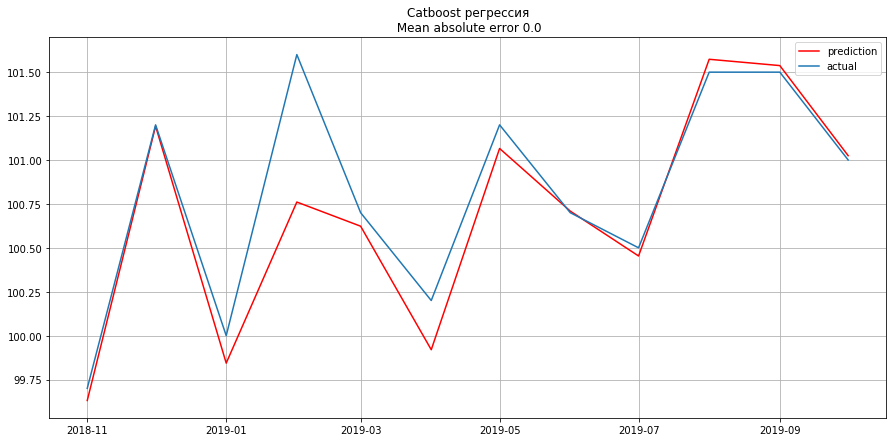

In [93]:
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],pred1, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_true.values, label="actual")
plt.legend(loc="best")
plt.title("Catboost регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_true,pred1))))
plt.grid(True);

In [94]:
mean_absolute_error(y_true,pred1)

0.1462257210022173

In [95]:
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, model.get_feature_importance(Pool(X_validation, label=y_validation,cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

Посмотрим топ 25 значимых параметров в модели

In [96]:
feature_score[:25]

Feature      Score
2   CPI INDEX 07.2.2 : FUELS & LUBRICANTS 2015=100                                   14.078523
1   CPI INDEX 04.5.3 : LIQUID FUELS 2015=100                                         13.925999
3   CPI INDEX 12.1.2/3 : APPLIANCES, ARTICLES & PRODUCTS FOR PERSONAL CARE 2015=100  10.393893
9   CPI INDEX 01.1.2 : MEAT 2015=100                                                 9.775309 
0   CPI INDEX 05.6.1 : NON-DURABLE HOUSEHOLD GOODS 2015=100                          9.741287 
6   CPI INDEX: Liquid fuels, vehicle fuels & lubricants (G) 2015=100                 8.902797 
5   CPI INDEX 12.1.3.2 Articles for personal hygiene and wellness 2015=100           4.893721 
16  CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100                 4.644850 
10  CPI INDEX: Energy and unprocessed food (SP) 2015=100                             4.364660 
4   CPI INDEX 01.1.4.4 Yoghurt 2015=100                                              4.293981 
7   CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100       2.847288 
11  CPI INDEX: Vehicles, spare parts & accessories (G) 2015=100                      2.757982 
14  CPI INDEX 09.1.4 : RECORDING MEDIA 2015=100                                      2.240916 
13  CPI INDEX 02.1.2.1 Wine from grapes 2015=100                                     1.705832 
17  CPI INDEX 01.1.1.7/8 Breakfast cereals and other cereal products 2015=100        1.147283 
15  CPI INDEX 01.1.7.5 Crisps 2015=100                                               1.087747 
12  CPI INDEX 01.1.4.2 Low fat milk 2015=100                                         1.081438 
19  Year                                                                             0.946269 
8   CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                                   0.703813 
18  Month                                                                            0.466413

## 3.3.2 Catboost регрессия после оптимизации с 19 переменными

In [97]:
#X=X[list(feature_score.Feature[feature_score.Score>=0.49])+['Month','Year']]
X=X[list(feature_score.Feature[feature_score.Score>=0.41])]
categorical_features_indices = np.where((X.columns == 'Month')| (X.columns == 'Year'))[0]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, shuffle=True)

In [107]:
model=CatBoostRegressor(#iterations=110, 
                        depth=2, 
                        learning_rate=0.01, 
                        loss_function='MAE',
                        l2_leaf_reg = 1,
                        task_type = "GPU",
                        early_stopping_rounds=100)
model.fit(X_train, y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          use_best_model=True,
          verbose=200,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1306297	test: 2.1333888	best: 2.1333888 (0)	total: 15.4ms	remaining: 15.4s
200:	learn: 1.5294412	test: 1.6158138	best: 1.6158138 (200)	total: 3.54s	remaining: 14.1s
400:	learn: 1.0379882	test: 1.2121660	best: 1.2121660 (400)	total: 6.84s	remaining: 10.2s
600:	learn: 0.7668870	test: 1.0050857	best: 1.0050857 (600)	total: 9.91s	remaining: 6.58s
800:	learn: 0.6247860	test: 0.8603504	best: 0.8603504 (800)	total: 13.3s	remaining: 3.29s
999:	learn: 0.5379663	test: 0.7664071	best: 0.7664071 (999)	total: 16.4s	remaining: 0us
bestTest = 0.7664071108
bestIteration = 999


In [108]:
pred2=model.predict(X[len(X)-12:])
y_true=y[len(X)-12:]
pd.DataFrame(data=dict(test=y_true, predict=pred2,abs_error=abs(y_true-pred2)))

test     predict  abs_error
118  99.7   100.608818  0.908818 
119  101.2  101.216428  0.016428 
120  100.0  100.207331  0.207331 
121  101.6  101.135482  0.464518 
122  100.7  100.823529  0.123529 
123  100.2  100.494798  0.294798 
124  101.2  101.166027  0.033973 
125  100.7  100.821442  0.121442 
126  100.5  100.502683  0.002683 
127  101.5  101.439941  0.060059 
128  101.5  101.467036  0.032964 
129  101.0  100.973055  0.026945

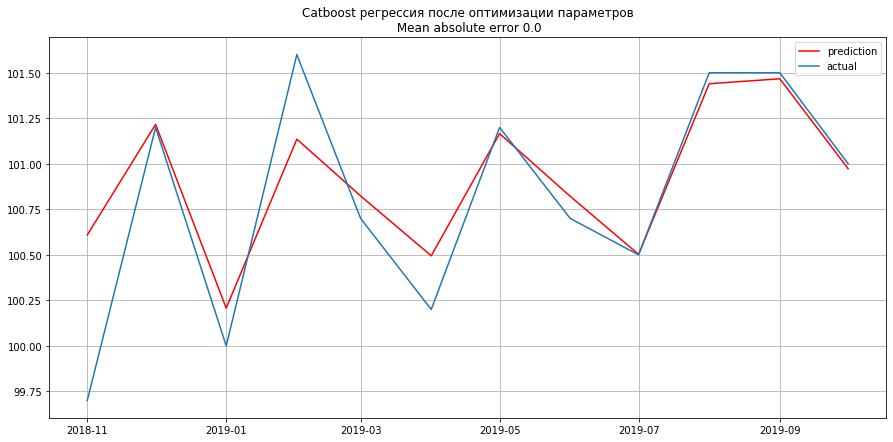

In [109]:
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],pred2, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_true.values, label="actual")
plt.legend(loc="best")
plt.title("Catboost регрессия после оптимизации параметров\n Mean absolute error {}".format(round(mean_absolute_error(y_true,pred2))))
plt.grid(True);

In [110]:
mean_absolute_error(y_true,pred2)

0.1911240462453847